### Configuration and display setup cell

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import pandas as pd
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings('ignore')

### `care_value` contains transforms for counting the total days on vasopressors per icu stay.

In [2]:
from chatto_transform.transforms.mimic import care_value

In [3]:
vent_days = care_value.VentilatorDays().load_transform()

In [4]:
vent_days

,subject_id,hadm_id,icustay_id,ventdays
0,3,145834,211552,4 days
1,9,150750,220597,5 days
2,12,112213,232669,4 days
3,13,143045,263738,2 days
4,31,128652,254478,8 days
...,...,...,...,...
20124,99939,159023,252442,1 days
20125,99955,108494,243255,5 days
20126,99982,151454,221194,1 days
20127,99985,176670,279638,10 days


In [5]:
death_days = care_value.TimeUntilDeath().load_transform()

In [6]:
death_days

,subject_id,hadm_id,icustay_id,hosdead,time_of_death,time_until_death
0,20,157681,264490,False,NaT,NaT
1,21,109451,217847,False,2135-02-08,136 days 07:45:00
2,21,111970,216859,True,2135-02-08,-1 days +21:52:00
3,22,165315,204798,False,NaT,NaT
4,23,152223,227807,False,NaT,NaT
...,...,...,...,...,...,...
61527,92947,190453,201667,False,NaT,NaT
61528,92950,179691,254458,False,NaT,NaT
61529,92954,158043,251989,False,2154-06-07,41 days 07:30:00
61530,92955,119664,260124,False,NaT,NaT


### We can use the `VasopressorDays` transform to get this count.

In [7]:
vaso_days = care_value.VasopressorDays().load_transform()

In [8]:
vaso_days

,subject_id,icustay_id,dobutamine_days,dopamine_days,epinephrine_days,levophed_days,milrinone_days,neosynephrine_days,vasopressin_days,total_vasopressor_days
0,3,211552,0 days,0 days,0 days,1 days,0 days,2 days,0 days,2 days
1,9,220597,0 days,0 days,0 days,2 days,0 days,0 days,0 days,2 days
2,17,257980,0 days,0 days,0 days,0 days,0 days,1 days,0 days,1 days
3,17,277042,0 days,0 days,0 days,0 days,0 days,2 days,0 days,2 days
4,20,264490,0 days,0 days,0 days,0 days,0 days,1 days,0 days,1 days
...,...,...,...,...,...,...,...,...,...,...
17379,99982,221194,0 days,0 days,0 days,5 days,7 days,0 days,0 days,7 days
17380,99982,239827,0 days,7 days,0 days,0 days,2 days,0 days,0 days,7 days
17381,99982,275958,0 days,0 days,0 days,0 days,5 days,0 days,0 days,5 days
17382,99985,279638,0 days,0 days,0 days,41 days,0 days,0 days,0 days,41 days


### We can also just ask for this for carevue or metavision:

In [9]:
metavision = care_value.VasopressorDays(metavision_only=True).load_transform()

In [10]:
metavision

,subject_id,icustay_id,dobutamine_days,dopamine_days,epinephrine_days,levophed_days,milrinone_days,neosynephrine_days,vasopressin_days,total_vasopressor_days
0,111,249202,0 days,0 days,2 days,1 days,0 days,1 days,1 days,2 days
1,124,256064,0 days,0 days,0 days,2 days,0 days,10 days,0 days,11 days
2,188,246866,0 days,0 days,0 days,0 days,0 days,4 days,0 days,4 days
3,188,284015,0 days,0 days,0 days,1 days,0 days,2 days,0 days,2 days
4,188,292343,0 days,0 days,0 days,0 days,0 days,1 days,0 days,1 days
...,...,...,...,...,...,...,...,...,...,...
7362,99982,221194,0 days,0 days,0 days,5 days,7 days,0 days,0 days,7 days
7363,99982,239827,0 days,7 days,0 days,0 days,2 days,0 days,0 days,7 days
7364,99982,275958,0 days,0 days,0 days,0 days,5 days,0 days,0 days,5 days
7365,99985,279638,0 days,0 days,0 days,41 days,0 days,0 days,0 days,41 days


### Let's plot number of days on ventilator vs days until death

In [11]:
from chatto_transform.lib.chunks import left_join

In [12]:
vent_death = left_join(vent_days, death_days, 'icustay_id')

In [13]:
vent_death

,subject_id_x,hadm_id_x,icustay_id,ventdays,subject_id_y,hadm_id_y,hosdead,time_of_death,time_until_death
0,3,145834,211552,4 days,3,145834,False,2102-06-14,225 days 10:02:00
1,9,150750,220597,5 days,9,150750,True,2149-11-14,-1 days +13:45:00
2,12,112213,232669,4 days,12,112213,True,2104-08-20,-1 days +21:03:00
3,13,143045,263738,2 days,13,143045,False,NaT,NaT
4,31,128652,254478,8 days,31,128652,True,2108-08-30,-1 days +09:00:00
...,...,...,...,...,...,...,...,...,...
20124,99939,159023,252442,1 days,99939,159023,False,NaT,NaT
20125,99955,108494,243255,5 days,99955,108494,True,2139-07-19,-1 days +18:40:00
20126,99982,151454,221194,1 days,99982,151454,False,2157-03-04,85 days 10:15:00
20127,99985,176670,279638,10 days,99985,176670,False,NaT,NaT


(-2.0, 3874.0)

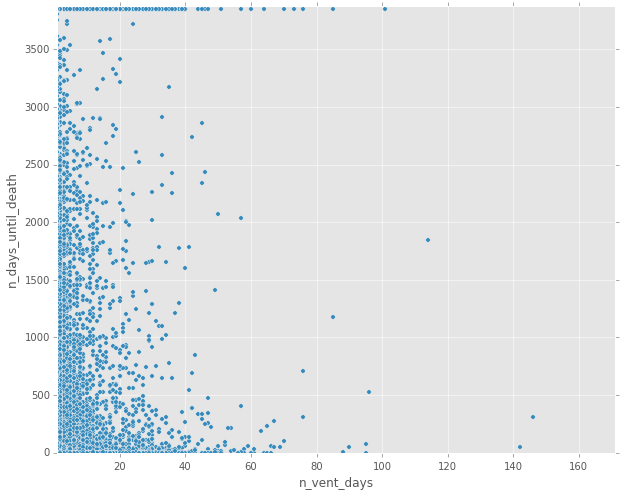

In [14]:
vent_death['n_vent_days'] = vent_death['ventdays'].dt.days
vent_death['n_days_until_death'] = vent_death['time_until_death'].dt.days

xmin = vent_death['n_vent_days'].min()
xmax = vent_death['n_vent_days'].max()

ymin = vent_death['n_days_until_death'].min()
ymax = vent_death['n_days_until_death'].max()

vent_death['n_days_until_death'].fillna(ymax, inplace=True)

ax = vent_death.plot(kind='scatter',
                x='n_vent_days',
                y='n_days_until_death')

ax.set_xlim([xmin, xmax + 25])
ax.set_ylim([ymin, ymax + 25])

### And the same for total days on vasopressors

In [15]:
vaso_death = left_join(vaso_days, death_days, 'icustay_id')

In [16]:
vaso_death

,subject_id_x,icustay_id,dobutamine_days,dopamine_days,epinephrine_days,...,subject_id_y,hadm_id,hosdead,time_of_death,time_until_death
0,3,211552,0 days,0 days,0 days,...,3,145834,0,2102-06-14,225 days 10:02:00
1,9,220597,0 days,0 days,0 days,...,9,150750,1,2149-11-14,-1 days +13:45:00
2,17,257980,0 days,0 days,0 days,...,17,161087,0,NaT,NaT
3,17,277042,0 days,0 days,0 days,...,17,194023,0,NaT,NaT
4,20,264490,0 days,0 days,0 days,...,20,157681,0,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
17379,99982,221194,0 days,0 days,0 days,...,99982,151454,0,2157-03-04,85 days 10:15:00
17380,99982,239827,0 days,7 days,0 days,...,99982,183791,0,2157-03-04,9 days 03:24:00
17381,99982,275958,0 days,0 days,0 days,...,99982,112748,0,2157-03-04,50 days 11:00:00
17382,99985,279638,0 days,0 days,0 days,...,99985,176670,0,NaT,NaT


(-2.0, 3874.0)

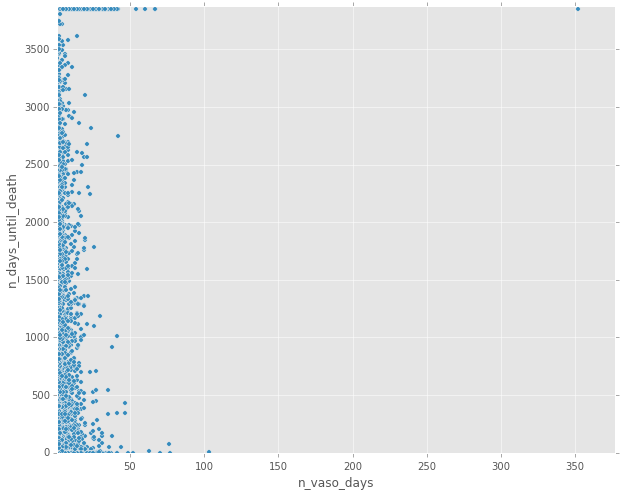

In [17]:
vaso_death['n_vaso_days'] = vaso_death['total_vasopressor_days'].dt.days
vaso_death['n_days_until_death'] = vent_death['time_until_death'].dt.days

xmin = vaso_death['n_vaso_days'].min()
xmax = vaso_death['n_vaso_days'].max()

ymin = vaso_death['n_days_until_death'].min()
ymax = vaso_death['n_days_until_death'].max()

vaso_death['n_days_until_death'].fillna(ymax, inplace=True)

ax = vaso_death.plot(kind='scatter',
                x='n_vaso_days',
                y='n_days_until_death')

ax.set_xlim([xmin, xmax + 25])
ax.set_ylim([ymin, ymax + 25])